In [49]:
#Dependencies 
import pandas as pd
from pathlib import Path
 
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import linregress

In [50]:
#Read csv files and merge population and total death data frames
population_df = pd.read_csv('Base Data/Resources/under1_population_by_region_df.csv')
deaths_df = pd.read_csv('Base Data/Resources/totalbirths_sum_df.csv')

mergedpopulationdeath_df = pd.merge(population_df, deaths_df, on='Region', how= 'outer')
mergedpopulationdeath_df.head()

,Unnamed: 0_x,Region,Total population up to 1 years old,Unnamed: 0_y,Area Code,Area Geography,Live births,Total deaths,Total births
0,0,NORTH EAST,50344.0,3,E12000001,Region,25153.0,426,25579.0
1,1,NORTH WEST,155911.0,17,E12000002,Region,78127.0,1475,79602.0
2,2,YORKSHIRE AND THE HUMBER,113986.0,61,E12000003,Region,56377.0,1138,57515.0
3,3,EAST MIDLANDS,95956.0,86,E12000004,Region,47860.0,894,48754.0
4,4,WEST MIDLANDS,128197.0,126,E12000005,Region,63846.0,1532,65378.0


In [51]:
#Create new data frame with area, population and total death column with a new column for infant mortality
infant_mortality_df = pd.DataFrame()
infant_mortality_df['Region'] = mergedpopulationdeath_df['Region']
infant_mortality_df['Total population up to 1 years old'] = mergedpopulationdeath_df['Total population up to 1 years old']
infant_mortality_df['Total deaths'] = mergedpopulationdeath_df['Total deaths']
infant_mortality_df['Infant mortality rate'] = ""
infant_mortality_df

,Region,Total population up to 1 years old,Total deaths,Infant mortality rate
0,NORTH EAST,50344.0,426,
1,NORTH WEST,155911.0,1475,
2,YORKSHIRE AND THE HUMBER,113986.0,1138,
3,EAST MIDLANDS,95956.0,894,
4,WEST MIDLANDS,128197.0,1532,
5,EAST,133105.0,1056,
6,LONDON,210812.0,1904,
7,SOUTH EAST,188216.0,1505,
8,SOUTH WEST,104062.0,686,


In [52]:
# Calculate the infant mortality rate per 1000 births
infant_mortality_df['Infant Mortality Rate'] = infant_mortality_df['Total deaths'] / infant_mortality_df['Total population up to 1 years old'] * 1000
infant_mortality_df

,Region,Total population up to 1 years old,Total deaths,Infant mortality rate,Infant Mortality Rate
0,NORTH EAST,50344.0,426,,8.461783
1,NORTH WEST,155911.0,1475,,9.460526
2,YORKSHIRE AND THE HUMBER,113986.0,1138,,9.983682
3,EAST MIDLANDS,95956.0,894,,9.316770
4,WEST MIDLANDS,128197.0,1532,,11.950358
5,EAST,133105.0,1056,,7.933586
6,LONDON,210812.0,1904,,9.031744
7,SOUTH EAST,188216.0,1505,,7.996132
8,SOUTH WEST,104062.0,686,,6.592224


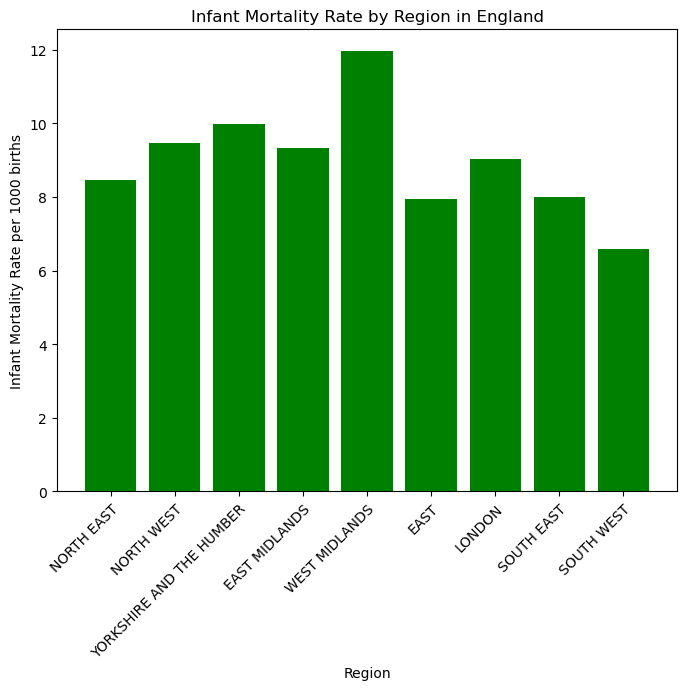

In [53]:
# Create a bar chart to show the infant mortality rate
plt.figure(figsize=(8,6))
plt.bar(infant_mortality_df['Region'], infant_mortality_df['Infant Mortality Rate'], color= 'green')
plt.xlabel('Region')
plt.ylabel('Infant Mortality Rate per 1000 births')
plt.title('Infant Mortality Rate by Region in England')
plt.xticks(rotation=45,ha="right", wrap=True)

# Save the figure
plt.savefig("Base Data/Resources/Infant_Mortality_Rate1.png")

# Diplay bar chart
plt.show()



## Analysis
From the bar chart, it is seen that West Midlands has the highest relative infant mortality rate.

In [54]:
## Get region with highest mortality rate

# Sort the data frame by 'Infant Mortality Rate' column in descending order
sorted_df = infant_mortality_df.sort_values('Infant Mortality Rate', ascending=False)

# Get the region with the highest mortality rate (the first row)
highest_mortality_region = sorted_df.iloc[0]['Region']

print("Region with the highest mortality rate:", highest_mortality_region)

Region with the highest mortality rate: WEST MIDLANDS


In [58]:
#Read csv files 
poverty_rate = pd.read_csv('Base Data/Resources/poverty_rate.csv')
poverty_rate['Region'] = poverty_rate['Region'].str.upper()

poverty_rate.head()

,Region,Percentage of Households Below 60% of the Median Income; (after housing costs)
0,LONDON,26.093693
1,NORTH EAST,23.423824
2,WEST MIDLANDS,22.671293
3,WALES,22.342927
4,YORKSHIRE AND THE HUMBER,21.095376


In [59]:
# Merge dataframes for poverty rate and infant mortality rate
mergedpoverty_infantmortality_df = pd.merge(infant_mortality_df, poverty_rate, on='Region', how= 'outer')
mergedpopulationdeath_df.head()

,Unnamed: 0_x,Region,Total population up to 1 years old,Unnamed: 0_y,Area Code,Area Geography,Live births,Total deaths,Total births
0,0,NORTH EAST,50344.0,3,E12000001,Region,25153.0,426,25579.0
1,1,NORTH WEST,155911.0,17,E12000002,Region,78127.0,1475,79602.0
2,2,YORKSHIRE AND THE HUMBER,113986.0,61,E12000003,Region,56377.0,1138,57515.0
3,3,EAST MIDLANDS,95956.0,86,E12000004,Region,47860.0,894,48754.0
4,4,WEST MIDLANDS,128197.0,126,E12000005,Region,63846.0,1532,65378.0


In [62]:
#Create new data frame with region, infant mortality and poverty rate columns
infant_mortality_to_poverty_df = pd.DataFrame()
infant_mortality_to_poverty_df['Region'] = mergedpoverty_infantmortality_df['Region']
infant_mortality_to_poverty_df['Infant Mortality Rate'] = mergedpoverty_infantmortality_df['Infant Mortality Rate']
infant_mortality_to_poverty_df['Poverty Rate'] = mergedpoverty_infantmortality_df['Percentage of Households Below 60% of the Median Income; (after housing costs)']

# Remove all rows with null or empty values 
infant_mortality_to_poverty_df.dropna(subset=['Infant Mortality Rate', 'Poverty Rate'], inplace=True)

infant_mortality_to_poverty_df

,Region,Infant Mortality Rate,Poverty Rate
0,NORTH EAST,8.461783,23.423824
1,NORTH WEST,9.460526,20.660498
2,YORKSHIRE AND THE HUMBER,9.983682,21.095376
3,EAST MIDLANDS,9.316770,20.042583
4,WEST MIDLANDS,11.950358,22.671293
6,LONDON,9.031744,26.093693
7,SOUTH EAST,7.996132,18.824819
8,SOUTH WEST,6.592224,18.896571


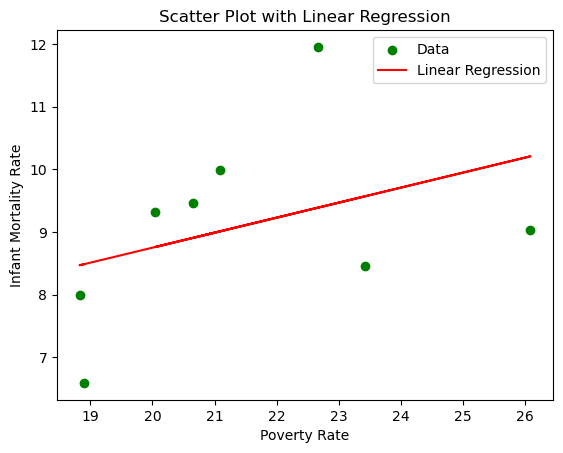

In [65]:
# Create Scattered plot linear regression to compare rates

# Scatter plot
plt.scatter(infant_mortality_to_poverty_df['Poverty Rate'], infant_mortality_to_poverty_df['Infant Mortality Rate'], color='green', label='Data')

# Linear regression line
m, b = np.polyfit(infant_mortality_to_poverty_df['Poverty Rate'], infant_mortality_to_poverty_df['Infant Mortality Rate'], 1)
plt.plot(infant_mortality_to_poverty_df['Poverty Rate'], m * infant_mortality_to_poverty_df['Poverty Rate'] + b, color='red', label='Linear Regression')

# Labels and title
plt.xlabel('Poverty Rate')
plt.ylabel('Infant Mortality Rate')
plt.title('Scatter Plot with Linear Regression')

# Legend
plt.legend()

# Save the figure
plt.savefig("Base Data/Resources/Infant_Mortality_Rate2.png")

# Display the plot
plt.show()

## Analysis
The plot shows a general negative trend, suggesting that regions with higher poverty rates tend to have higher infant mortality rates.The red regression line represents the linear relationship between the mortality rate and the poverty rate.It is important to note that the relationship is not perfect, as there is some scatter around the line, therefore, further analysis and statistical tests could be conducted to determine the strength and significance of the relationship between the infant mortality rate and the poverty rate; considering other factors such as healthcare infrastructure and other socio-economic conditions could provide a more comprehensive understanding of the factors influencing infant mortality rates across different regions in England.

Overall, this analysis demonstrates the importance of addressing poverty and its potential impact on infant mortality rates, emphasizing the need for targeted interventions and policies to improve health outcomes for vulnerable populations.